<a href="https://colab.research.google.com/github/finesketch/deep_learning/blob/main/3.%20Natural%20Language%20Processing%20in%20TensorFlow/Course3_Week4_Lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2020-12-05 15:08:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2020-12-05 15:08:26 (117 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [4]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [6]:
len(corpus)

1693

In [9]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [12]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print(input_sequences[:7])

# create predictors and label
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
print(xs[:7])
print(labels[:7])

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
print(ys.shape)

16
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    51   12]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0   51
    12   96]
 [   0    0    0    0    0    0    0    0    0    0    0    0   51   12
    96 1217]
 [   0    0    0    0    0    0    0    0    0    0    0   51   12   96
  1217   48]
 [   0    0    0    0    0    0    0    0    0    0   51   12   96 1217
    48    2]
 [   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
     2   69]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     2   11]]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    51]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0   51
    12]
 [   0    0    0    0    0    0    0    0    0    0    0    0   51   12
    96]
 [   0    0    0    0    0    0    0    0    0    0    0   51   12   96
  1217]
 [   0    0    0    0    0    0    0    0    0    0   51   12   96 1217
    48]
 

In [13]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [14]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [15]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [16]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [17]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [23]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(total_words, 100, input_length=max_sequence_len-1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
  tf.keras.layers.Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=['accuracy'])

model.summary()

history = model.fit(xs, ys, epochs=500, verbose=1)

print(model)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 15, 100)           269000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300)               301200    
_________________________________________________________________
dense_1 (Dense)              (None, 2690)              809690    
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
377/377 [==============================] - 4s 10ms/step - loss: 6.6464 - accuracy: 0.0737
Epoch 2/500
377/377 [==============================] - 3s 9ms/step - loss: 5.8155 - accuracy: 0.1102
Epoch 3/500
377/377 [==============================] - 3s 9ms/step - loss: 4.9871 - accuracy: 0.1590
Epoch 4/500
377/377 [==============================] - 4s 9ms/step - l

In [24]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.show()


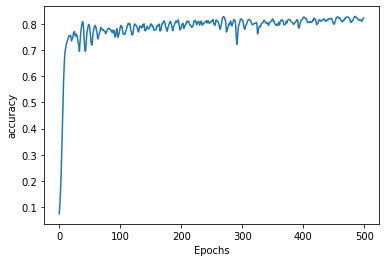

In [25]:
plot_graphs(history, 'accuracy')

In [26]:
seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = model.predict_classes(token_list, verbose=0)
  output_word = ' '
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += ' ' + output_word

print(seed_text)

I've got a bad feeling about this she venture to give ye my word on me gone and the way the rocky slopes neer a tear in your prime eyes gone gone gone your were gone away now gone to the gone by your love gone gone gone away your gone rode your right till gone by and i light times love easy as i love me gone and all gone and gone and down on me mountain love gone and shes gone gone gone gone gone gone gone away gun leaving so street round kilgary mountain true love gone the reel rings it love i love
